In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [5]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [6]:
# Name of the dataset, which will be read by pandas
#DATASET_NAME = 'loan.csv'
df = pd.read_csv('loan.csv')

In [7]:
df.shape

(39717, 111)

In [8]:
null_data = df.isnull().sum()/39717*100

In [9]:
null_data

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

In [10]:
threshold=40
filtered_df = null_data[null_data > threshold].index
filtered_df

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [11]:
filtered_df

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [12]:
filtered_df.size

57

In [13]:
filtered_df = df.drop(columns=filtered_df)

In [14]:
filtered_df.shape

(39717, 54)

In [15]:
other_columns_to_drop = ['last_credit_pull_d', 'desc', 'title', 'tax_liens', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med', 'emp_title']
filtered_df = filtered_df.drop(columns=other_columns_to_drop)

In [16]:
filtered_df['term'] = filtered_df['term'].apply(lambda x: x.strip().split(' ')[0])
filtered_df['term'] = filtered_df['term'].astype(int)


In [17]:
filtered_df.shape

(39717, 47)

In [18]:
filtered_df['int_rate'] = filtered_df['int_rate'].apply(lambda x: x.strip().split('%')[0])
filtered_df['int_rate'] = filtered_df['term'].astype(float)

In [19]:
def transform_emp_duration(duration):
    if (pd.isnull(duration)):
        return np.nan
    duration = duration.strip()
    if duration == '< 1 year':
        return 0
    if duration == '10+ years':
        return 10
    return int(duration.split()[0])

In [20]:
filtered_df['emp_length'] = filtered_df['emp_length'].apply(lambda x: transform_emp_duration(x))
filtered_df['emp_length'] = pd.to_numeric(filtered_df['emp_length'], errors='coerce').astype(pd.Int64Dtype())

In [21]:
filtered_df.revol_util.head()

0    83.70%
1     9.40%
2    98.50%
3       21%
4    53.90%
Name: revol_util, dtype: object

In [22]:
filtered_df['home_ownership'] = filtered_df['home_ownership'].replace('NONE', 'OTHER')
filtered_df['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
5            RENT
6            RENT
7            RENT
8             OWN
9            RENT
10            OWN
11            OWN
12           RENT
13           RENT
14           RENT
15           RENT
16           RENT
17       MORTGAGE
18       MORTGAGE
19           RENT
20           RENT
21           RENT
22            OWN
23           RENT
24           RENT
25       MORTGAGE
26           RENT
27           RENT
28       MORTGAGE
29           RENT
30       MORTGAGE
31       MORTGAGE
32           RENT
33           RENT
34           RENT
35           RENT
36           RENT
37           RENT
38           RENT
39           RENT
40           RENT
41           RENT
42       MORTGAGE
43           RENT
44       MORTGAGE
45           RENT
46       MORTGAGE
47           RENT
48           RENT
49           RENT
50       MORTGAGE
51           RENT
52           RENT
53           RENT
54           RENT
55        

In [23]:
def revol_util(d):
    if (pd.isnull(d)):
        return np.nan
    if type(d) == 'float':
        return d
    return float(d.split('%')[0])

In [24]:
filtered_df.revol_util = filtered_df.revol_util.apply(revol_util)

In [25]:
def write_to_file(data, path):
    with open(path, 'w') as file:
        file.write(data.to_string())

In [26]:
filtered_df.isnull().sum().sort_values(ascending=True)

id                            0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collection_recovery_fee       0
last_pymnt_amnt               0
policy_code                   0
application_type              0
acc_now_delinq                0
delinq_amnt                   0
delinq_2yrs                   0
earliest_cr_line              0
addr_state                    0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
dti     

In [27]:
filtered_df[filtered_df.loan_status == 'Charged Off'].groupby(['grade', 'sub_grade']).size()

grade  sub_grade
A      A1            30
       A2            74
       A3           103
       A4           178
       A5           217
B      B1           171
       B2           228
       B3           341
       B4           329
       B5           356
C      C1           336
       C2           321
       C3           270
       C4           212
       C5           208
D      D1           167
       D2           271
       D3           256
       D4           215
       D5           209
E      E1           198
       E2           163
       E3           119
       E4           126
       E5           109
F      F1            91
       F2            70
       F3            51
       F4            53
       F5            54
G      G1            31
       G2            28
       G3            19
       G4            13
       G5            10
dtype: int64

In [28]:
filtered_df[filtered_df.loan_status == 'Fully Paid'].groupby('grade').size()

grade
A     9443
B    10250
C     6487
D     3967
E     1948
F      657
G      198
dtype: int64

In [29]:
filtered_df.groupby('grade').size()

grade
A    10085
B    12020
C     8098
D     5307
E     2842
F     1049
G      316
dtype: int64

In [30]:
filtered_df.groupby('revol_util').size()

revol_util
0.00     977
0.01       1
0.03       1
0.04       1
0.05       1
0.10      58
0.12       1
0.16       1
0.20      63
0.30      42
0.40      41
0.46       1
0.49       1
0.50      48
0.54       1
0.60      39
0.70      45
0.75       1
0.80      43
0.83       1
0.86       1
0.90      40
1.00      49
1.10      34
1.20      34
1.30      35
1.40      31
1.50      31
1.60      21
1.70      30
1.80      40
1.88       1
1.90      30
2.00      35
2.10      32
2.20      33
2.30      39
2.40      38
2.50      28
2.60      28
2.64       1
2.70      30
2.80      32
2.90      30
3.00      26
3.10      35
3.18       1
3.20      35
3.30      43
3.40      24
3.50      32
3.60      33
3.70      33
3.80      30
3.90      24
4.00      37
4.10      29
4.20      28
4.30      33
4.40      29
4.50      37
4.60      37
4.70      28
4.80      36
4.85       1
4.90      14
5.00      38
5.10      31
5.20      32
5.30      37
5.33       1
5.34       1
5.40      34
5.50      32
5.60      42
5.70      33
5

In [31]:
filtered_df.revol_util.describe()

count    39667.000000
mean        48.832152
std         28.332634
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [32]:
filtered_df.revol_util.median()

49.3

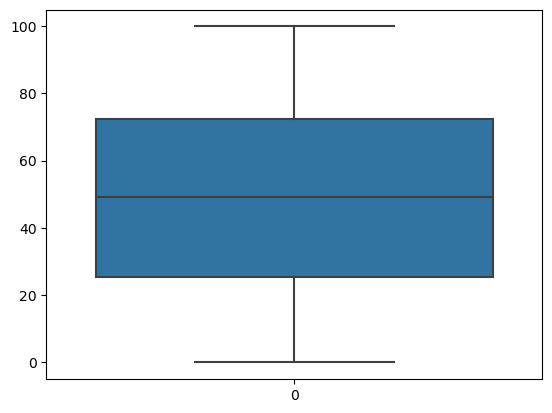

In [33]:
sns.boxplot(filtered_df.revol_util)
plt.show()

In [34]:
filtered_df.revol_util.fillna(48.8, inplace=True)

In [35]:
filtered_df.revol_util.isnull().sum()

0

In [36]:
filtered_df.last_pymnt_d.fillna('May-16', inplace=True)

In [37]:
filtered_df.last_pymnt_d.isnull().sum()

0

In [38]:
filtered_df.pub_rec_bankruptcies.mode()

0    0.0
Name: pub_rec_bankruptcies, dtype: float64

In [39]:
filtered_df.pub_rec_bankruptcies.describe()

count    39020.000000
mean         0.043260
std          0.204324
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

<Axes: >

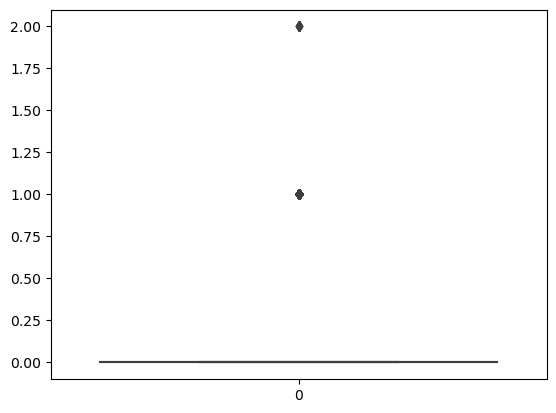

In [40]:
sns.boxplot(filtered_df.pub_rec_bankruptcies)

In [41]:
filtered_df.pub_rec_bankruptcies.fillna(0, inplace=True)

In [42]:
filtered_df.pub_rec_bankruptcies.isnull().sum()

0

In [43]:
filtered_df.groupby('emp_length').size()

emp_length
0     4583
1     3240
2     4388
3     4095
4     3436
5     3282
6     2229
7     1773
8     1479
9     1258
10    8879
dtype: int64

In [44]:
filtered_df[filtered_df.emp_length.isnull() == True].groupby('loan_status').size()

loan_status
Charged Off    228
Current         42
Fully Paid     805
dtype: int64

In [45]:
filtered_df[filtered_df.emp_length.isnull() == True]

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
168    1067644    1302032       2500         2500      2500.000000    36   
323    1058717    1290516      18000        18000     18000.000000    60   
394    1064582    1298394       4000         4000      4000.000000    36   
422    1064366    1298164       1000         1000      1000.000000    36   
439    1063912    1296491       8250         8250      8250.000000    36   
534    1062897    1295380       1700         1700      1700.000000    36   
555    1062781    1294654       5000         5000      5000.000000    36   
562    1062535    1294602       3000         3000      3000.000000    36   
569    1036838    1266720       8575         8575      8575.000000    36   
678    1061194    1292992       5600         5600      5600.000000    36   
711    1060848    1292813       6500         6500      6500.000000    60   
750    1060485    1292242      14125        14125     14125.000000    36   
861    1059128    1290942       7000         7000      7000.000000    60   
900    1056011    1287582       2250         2250      2250.000000    36   
931    1051228    1282516       6000         6000      6000.000000    60   
973    1018385    1246619       7000         7000      7000.000000    36   
983    1057726    1289493      15000        15000     15000.000000    36   
1016   1057318    1288882      12000         9650      9650.000000    60   
1088    926180    1146931      12000        12000     12000.000000    36   
1091   1056081    1287654      15000        15000     15000.000000    36   
1121   1055716    1287282       8500         8500      8500.000000    36   
1138   1055566    1287125       5000         5000      5000.000000    36   
1146   1055300    1286863       4000         4000      4000.000000    36   
1157   1055222    1286778       5000         5000      5000.000000    36   
1173   1054702    1286555      20400        20400     20375.000000    60   
1225   1053966    1285571       5000         5000      5000.000000    36   
1256   1053445    1285040       1400         1400      1400.000000    36   
1279   1053257    1284831       9250         9250      9250.000000    36   
1311   1052258    1283811       7200         7200      7200.000000    36   
1326   1052485    1284017       5325         5325      5325.000000    36   
1336   1052397    1283921      12000        12000     11933.284910    36   
1400   1051591    1282697       8000         8000      8000.000000    36   
1406   1051328    1282620      10000        10000     10000.000000    36   
1418   1048624    1279583      16000        16000     16000.000000    60   
1424    988714    1212800      15000        15000     15000.000000    36   
1427   1051020    1282483       2125         2125      2125.000000    36   
1519   1047885    1278994      20000        20000     19975.000000    60   
1521   1049562    1280778      23000        23000     22975.000000    60   
1562   1048813    1279985      25000        25000     25000.000000    60   
1566   1048877    1280056       4800         4800      4800.000000    36   
1576   1048395    1279722      21000        21000     20875.000000    36   
1593   1047727    1278835       9000         9000      8925.000000    36   
1623   1047982    1279112      24000        24000     24000.000000    60   
1640   1030910    1260513       5000         5000      5000.000000    36   
1674   1043970    1274097      25000        25000     24950.000000    60   
1778   1031634    1261059       5000         5000      5000.000000    60   
1791   1045932    1276758      12000        12000     11925.000000    36   
1826   1045339    1275958       3200         3200      3200.000000    36   
1827   1045458    1275865      14000        14000     13875.000000    36   
1902   1044374    1274720       2500         2500      2500.000000    36   
1964   1042857    1273155      10000        10000     10000.000000    36   
1987    999353    1225132      10000        10000     10000.

In [46]:
filtered_df.shape

(39717, 47)

In [47]:

filtered_df.emp_length.fillna(10, inplace=True)

In [48]:
filtered_df.emp_length.isnull().sum()

0

In [49]:
filtered_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [50]:
filtered_df.shape

(39717, 47)

##### convert amount columns into numeric data to find some correlation among important ones.

In [51]:
cols1 = ['loan_amnt','funded_amnt','int_rate','funded_amnt_inv','installment','annual_inc','dti','emp_length','total_pymnt']
filtered_df[cols1] = (filtered_df[cols1]).apply(pd.to_numeric)

filtered_df.shape

(39717, 47)

In [52]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int32  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               39717 non-null  Int64  
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [53]:
(filtered_df.loan_status.value_counts()*100)/len(filtered_df)

Fully Paid     82.961956
Charged Off    14.167737
Current         2.870307
Name: loan_status, dtype: float64

In [54]:
(filtered_df.purpose.value_counts()*100)/len(filtered_df)

debt_consolidation    46.934562
credit_card           12.916383
other                 10.053629
home_improvement       7.493013
major_purchase         5.506458
small_business         4.602563
car                    3.900093
wedding                2.384369
medical                1.744845
moving                 1.467885
vacation               0.959287
house                  0.959287
educational            0.818289
renewable_energy       0.259335
Name: purpose, dtype: float64

In [55]:
filtered_df.issue_d = pd.to_datetime(filtered_df.issue_d, format='%b-%y')
filtered_df['issue_year']=filtered_df['issue_d'].dt.year
filtered_df['issue_month']=filtered_df['issue_d'].dt.month


filtered_df.head(5)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  term  \
0  1077501    1296599       5000         5000           4975.0    36   
1  1077430    1314167       2500         2500           2500.0    60   
2  1077175    1313524       2400         2400           2400.0    36   
3  1076863    1277178      10000        10000          10000.0    36   
4  1075358    1311748       3000         3000           3000.0    60   

   int_rate  installment grade sub_grade  emp_length home_ownership  \
0      36.0       162.87     B        B2          10           RENT   
1      60.0        59.83     C        C4           0           RENT   
2      36.0        84.33     C        C5          10           RENT   
3      36.0       339.31     C        C1          10           RENT   
4      60.0        67.79     B        B5           1           RENT   

   annual_inc verification_status    issue_d  loan_status pymnt_plan  \
0     24000.0            Verified 2011-12-01   Fully Paid          n   
1     30000.0     Source Verified 2011-12-01  Charged Off          n   
2     12252.0        Not Verified 2011-12-01   Fully Paid          n   
3     49200.0     Source Verified 2011-12-01   Fully Paid          n   
4     80000.0     Source Verified 2011-12-01      Current          n   

                                                 url         purpose zip_code  \
0  https://lendingclub.com/browse/loanDetail.acti...     credit_card    860xx   
1  https://lendingclub.com/browse/loanDetail.acti...             car    309xx   
2  https://lendingclub.com/browse/loanDetail.acti...  small_business    606xx   
3  https://lendingclub.com/browse/loanDetail.acti...           other    917xx   
4  https://lendingclub.com/browse/loanDetail.acti...           other    972xx   

  addr_state    dti  delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  \
0         AZ  27.65            0           Jan-85               1         3   
1         GA   1.00            0           Apr-99               5         3   
2         IL   8.72            0           Nov-01               2         2   
3         CA  20.00            0           Feb-96               1        10   
4         OR  17.94            0           Jan-96               0        15   

   pub_rec  revol_bal  revol_util  total_acc initial_list_status  out_prncp  \
0        0      13648        83.7          9                   f       0.00   
1        0       1687         9.4          4                   f       0.00   
2        0       2956        98.5         10                   f       0.00   
3        0       5598        21.0         37                   f       0.00   
4        0      27783        53.9         38                   f     524.06   

   out_prncp_inv   total_pymnt  total_pymnt_inv  total_rec_prncp  \
0           0.00   5863.155187          5833.84          5000.00   
1           0.00   1008.710000          1008.71           456.46   
2           0.00   3005.666844          3005.67          2400.00   
3           0.00  12231.890000         12231.89         10000.00   
4         524.06   3513.330000          3513.33          2475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3        2214.92               16.97        0.00                     0.00   
4        1037.39                0.00        0.00                     0.00   

  last_pymnt_d  last_pymnt_amnt  policy_code application_type  acc_now_delinq  \
0       Jan-15           171.62            1       INDIVIDUAL               0   
1       Apr-13           119.66            1       INDIVIDUAL               0   
2       Jun-14           649.91            1       INDIVIDUAL               0   
3       Jan-15           357.48            1       INDIVIDUAL               0   
4

## Seggregate the columns

In [56]:
#Continuous and numerical are same names(for numeric values)
cat_col=['initial_list_status','application_type','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','zip_code','emp_length']
cont_col = ['id', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal','total_acc', 'out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv',
           'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt','policy_code','acc_now_delinq',
           'delinq_amnt','delinq_2yrs','funded_amnt_inv','int_rate','term','installment','dti','member_id','funded_amnt','annual_inc','loan_amnt','pub_rec_bankruptcies']
extra_col = ['earliest_cr_line','addr_state','issue_d','pymnt_plan','url','last_pymnt_d','revol_util']

len(cat_col) + len(cont_col) + len(extra_col)

47

In [57]:
count_unique=filtered_df.nunique().sort_values()
count_unique

delinq_amnt                    1
acc_now_delinq                 1
application_type               1
policy_code                    1
pymnt_plan                     1
initial_list_status            1
term                           2
int_rate                       2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
issue_year                     5
grade                          7
inq_last_6mths                 9
emp_length                    11
delinq_2yrs                   11
issue_month                   12
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util

In [58]:
filtered_df.drop(count_unique[count_unique==1].index, axis=1, inplace=True)

In [59]:
filtered_df.shape

(39717, 43)

# Univariate Analysis

## Univariate Numerical

### Histogram is used to display the frequency distribution

#### loan_amount

In [60]:
filtered_df.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

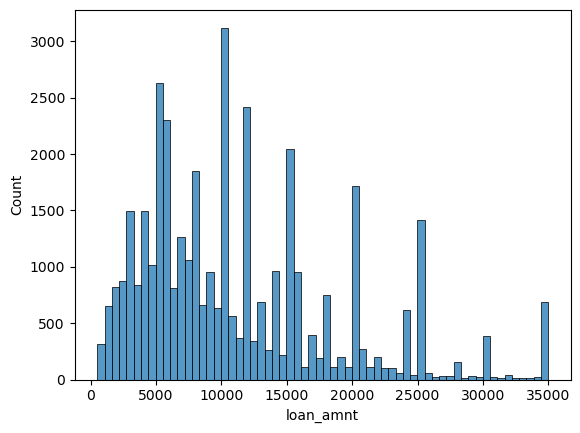

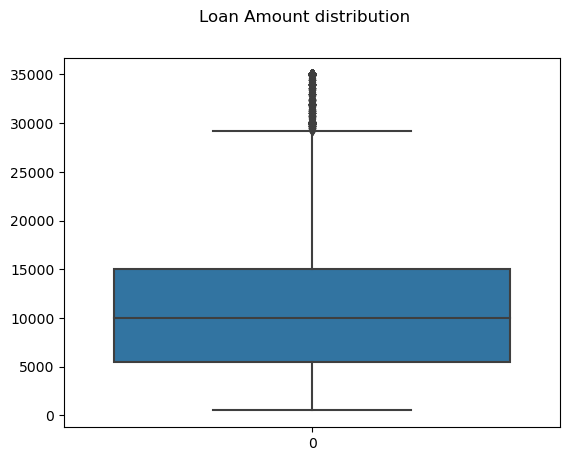

In [61]:
sns.histplot(filtered_df['loan_amnt'])
plt.show()

sns.boxplot(data=filtered_df.loan_amnt)
#Single title for both subplots.
plt.suptitle('Loan Amount distribution')
plt.show()

Observations: So,from the above plot we can see that, the 25th and 75th centiles lie between 500 and 15000. Which means most people had taken loan amount between 5000-15000, and also median of distribution is 10000. And very few people took more than 30000 loan amount.

#### funded_amnt: The total amount committed to that loan at that point in time.

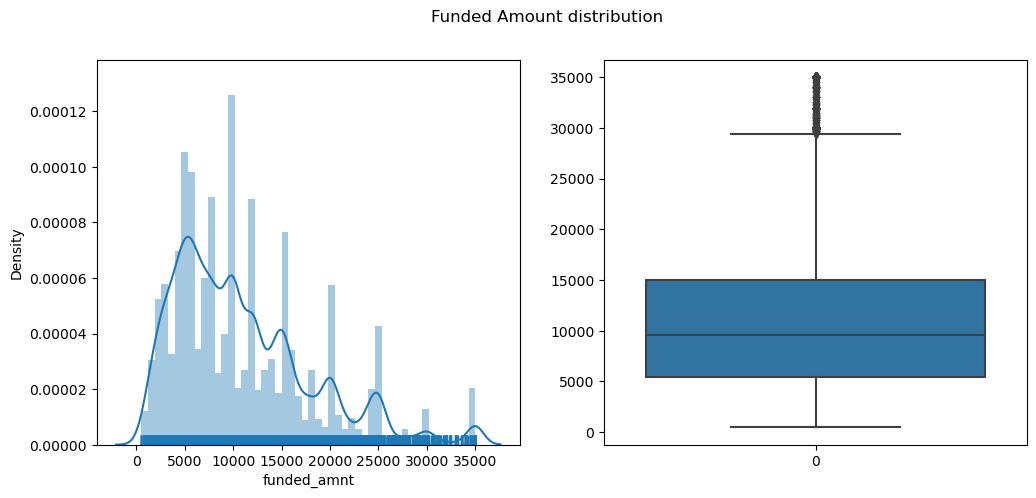

In [62]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.funded_amnt)
plt.suptitle('Funded Amount distribution')
plt.show()

In [63]:
filtered_df.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

### Observations:
Funded amount data behaves similiar to loan amount, which tells us that Lending club approved most of Applied loan amount.

#### funded_amnt_inv: The total amount committed by investors for that loan at that point in time

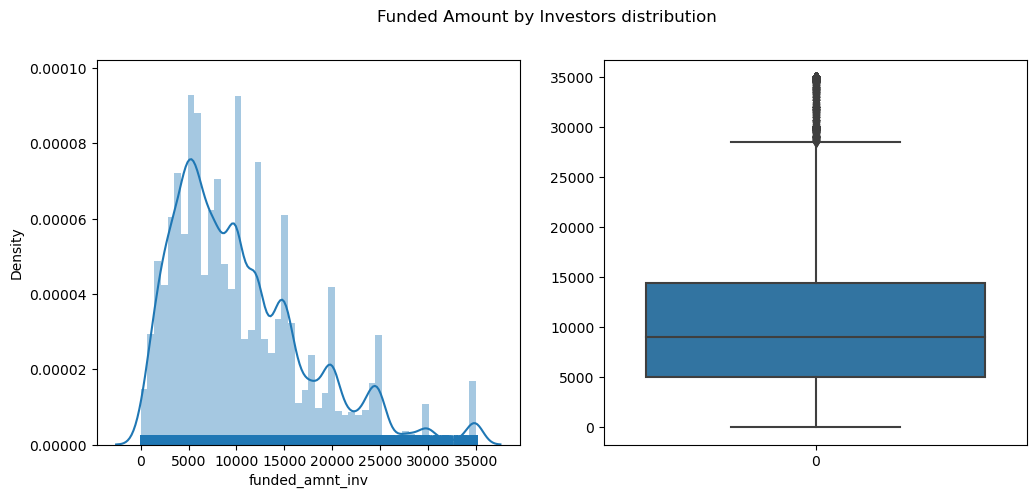

In [64]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.funded_amnt_inv)
plt.suptitle('Funded Amount by Investors distribution')
plt.show()

In [65]:
filtered_df.funded_amnt_inv.describe()

count    39717.000000
mean     10397.448868
std       7128.450439
min          0.000000
25%       5000.000000
50%       8975.000000
75%      14400.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

##### Observations:Funded amount by investors data behaves similiar to loan amount, which tells us that Lending club approved most of Applied loan amount. Majority investment lies between 5000 to 15000 (in lakhs)

#### int_rate:Interest Rate on the loan

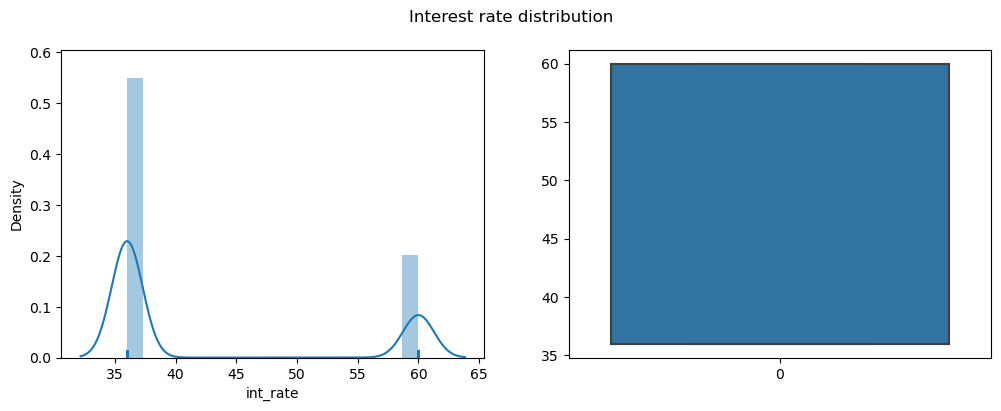

In [66]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.int_rate)
plt.suptitle('Interest rate distribution')
plt.show()

#### Observations: It was found that the interest rate falls within the range of 35%-60%.

#### emp_length: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

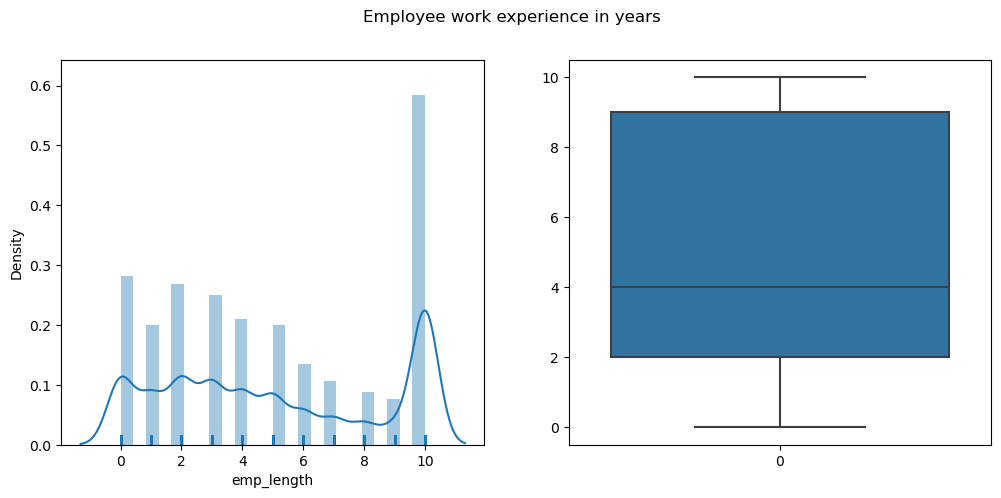

In [114]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.emp_length, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.emp_length)
plt.suptitle('Employee work experience in years')
plt.show()

#### Observation: Majority of employees have more than 10 years of work experience.

#### annual_inc: The self-reported annual income provided by the borrower during registration.

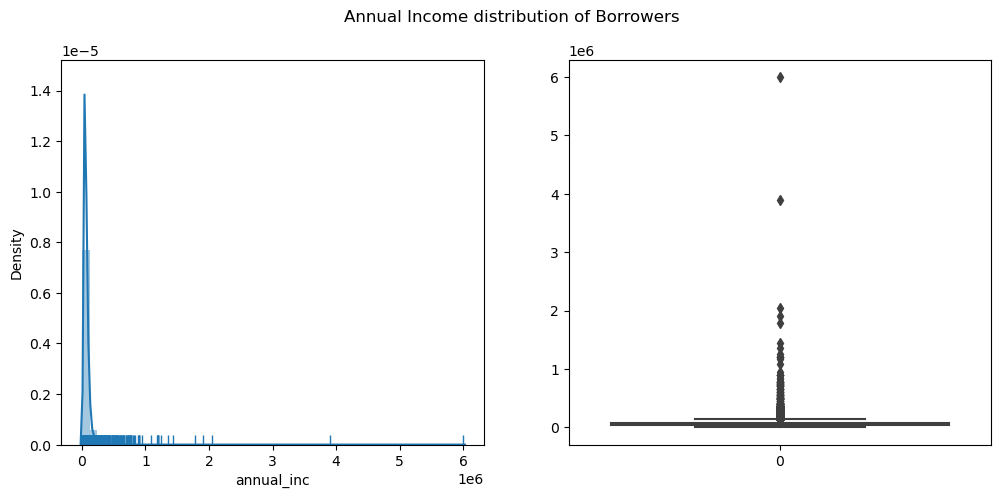

In [68]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.annual_inc)
plt.suptitle('Annual Income distribution of Borrowers')
plt.show()

In [69]:
#Before removing outliers
filtered_df.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [70]:
filtered_df = filtered_df[filtered_df["annual_inc"] < filtered_df["annual_inc"].quantile(0.99)]

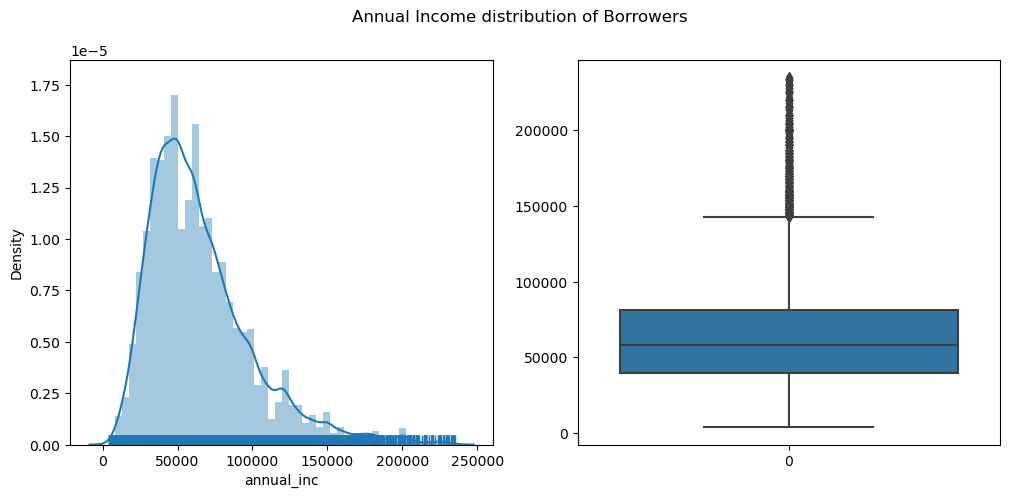

In [71]:
#After removing outliers
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.annual_inc)
#sns.distplot(filtered_df[filtered_df['annual_inc'] < 30000]['annual_inc'], bins = 5)
plt.suptitle('Annual Income distribution of Borrowers')
plt.show()

#### Observations:
Majority of loan applicants have income less than 5 lakhs

In [72]:
filtered_df.annual_inc.describe()

count     39319.000000
mean      65524.215803
std       35215.885297
min        4000.000000
25%       40000.000000
50%       58000.000000
75%       81000.000000
max      234996.000000
Name: annual_inc, dtype: float64

### installment: Total current balance of all installment accounts

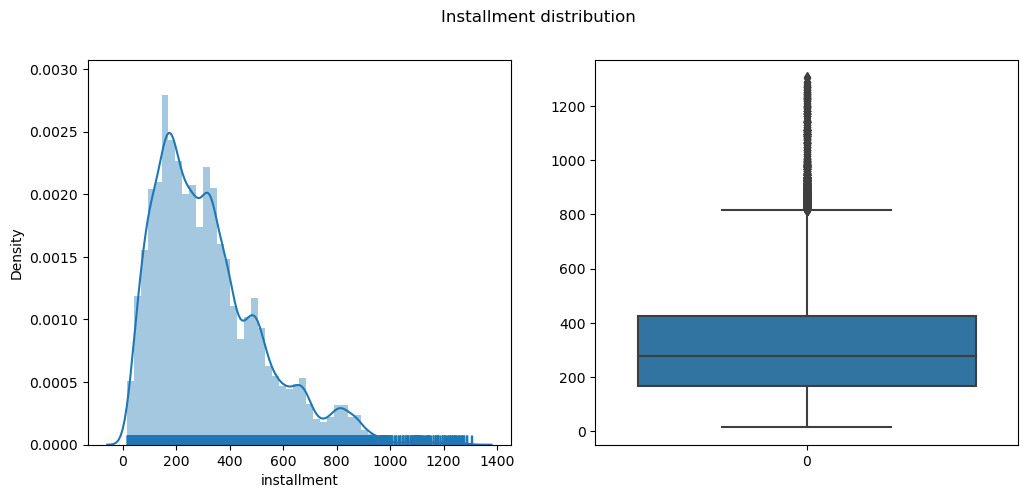

In [73]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.installment)
plt.suptitle('Installment distribution')
plt.show()

In [74]:
filtered_df.installment.describe()

count    39319.000000
mean       322.017733
std        206.206225
min         15.690000
25%        166.190000
50%        278.920000
75%        426.100000
max       1305.190000
Name: installment, dtype: float64

#### Observations: Most of the installments lie in between 200 to 430 months. Where 324 being the median

### pub_rec_bankruptcies:Number of public record bankruptcies

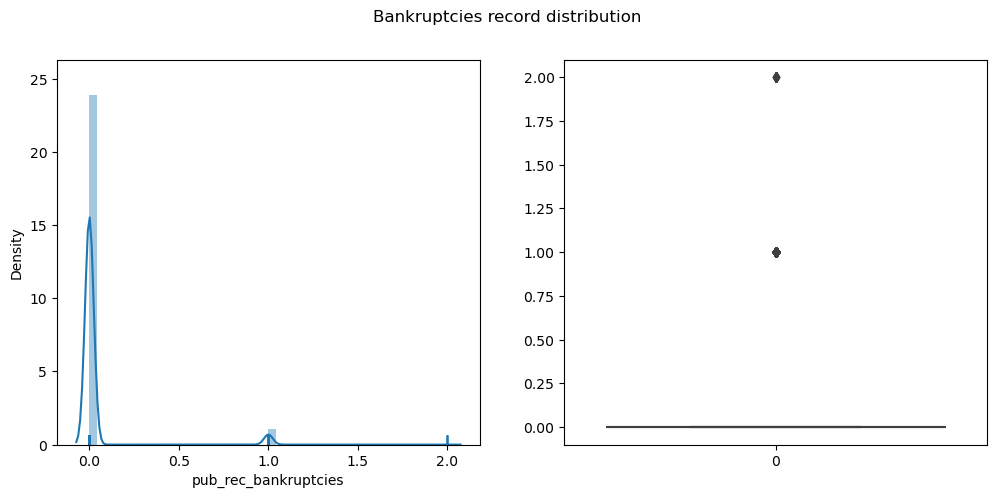

In [75]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.pub_rec_bankruptcies, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.pub_rec_bankruptcies)
plt.suptitle('Bankruptcies record distribution')
plt.show()

In [76]:
filtered_df = filtered_df[filtered_df["pub_rec_bankruptcies"] < filtered_df["pub_rec_bankruptcies"].quantile(0.99)]

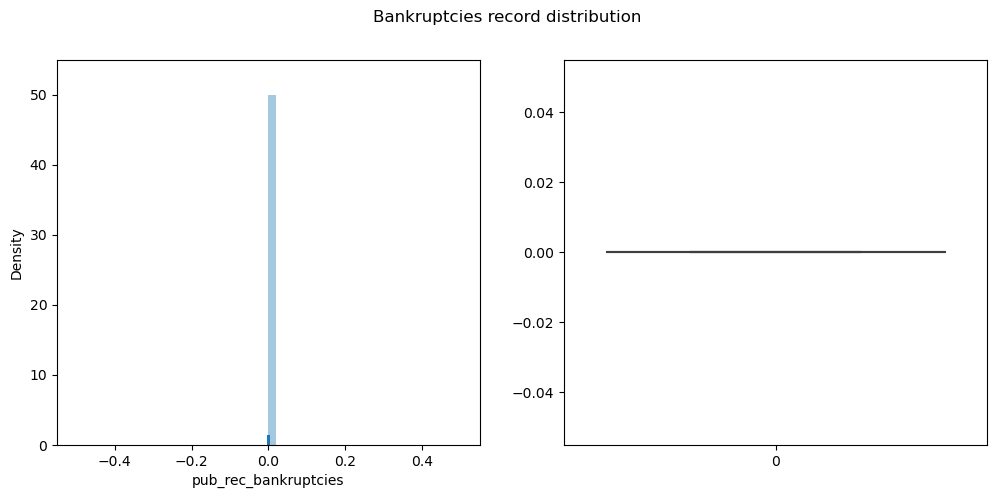

In [77]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.distplot(a=filtered_df.pub_rec_bankruptcies, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=filtered_df.pub_rec_bankruptcies)
plt.suptitle('Bankruptcies record distribution')
plt.show()

In [78]:
filtered_df.pub_rec_bankruptcies.describe()

count    37642.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: pub_rec_bankruptcies, dtype: float64

#### Observations:There is no record of public record bankruptcies.

### Loanstatus: Current status of the loan

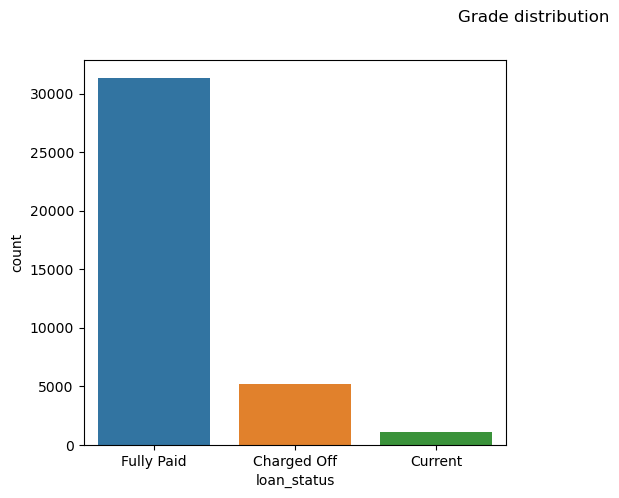

In [100]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x= filtered_df["loan_status"])
plt.suptitle('Grade distribution')
plt.show()

#### Observation: Most of the loan is paid. It is seen that around 15% are Defaulters.

In [104]:
filtered_df["loan_status"].value_counts()

Fully Paid     31338
Charged Off     5217
Current         1087
Name: loan_status, dtype: int64

# Segmented Univariate analysis

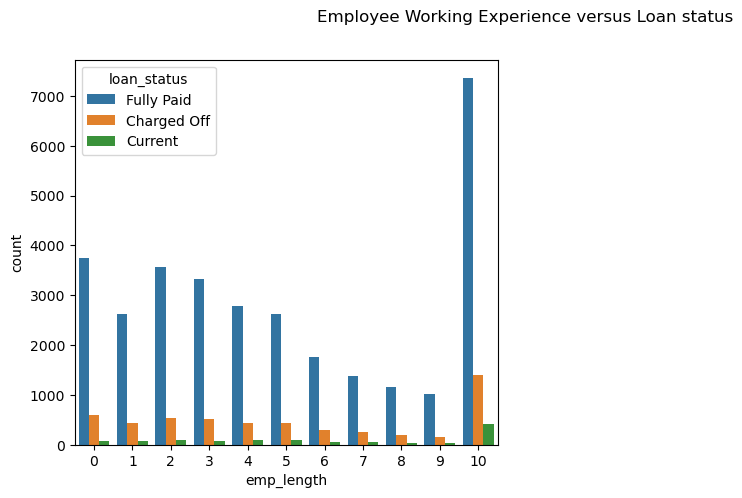

In [118]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(x=filtered_df['emp_length'], hue=filtered_df['loan_status'], data=filtered_df)
plt.suptitle('Employee Working Experience versus Loan status')
plt.show()

#### Observation: Majority of employees applying for the loan have more than 10 years of experience

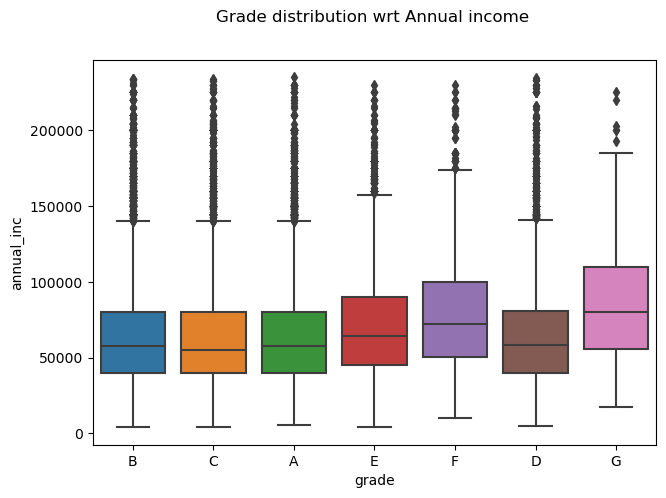

In [122]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(x=filtered_df['grade'], y=filtered_df['annual_inc'])
plt.suptitle('Grade distribution wrt Annual income', x=0.3)
plt.show()

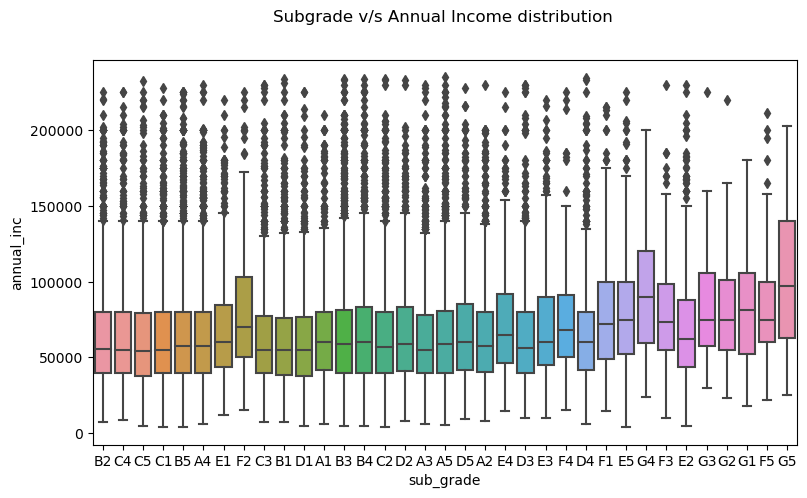

In [97]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x=filtered_df['sub_grade'], y=filtered_df['annual_inc'])
plt.suptitle('Subgrade v/s Annual Income distribution', x=0.3)
plt.show()

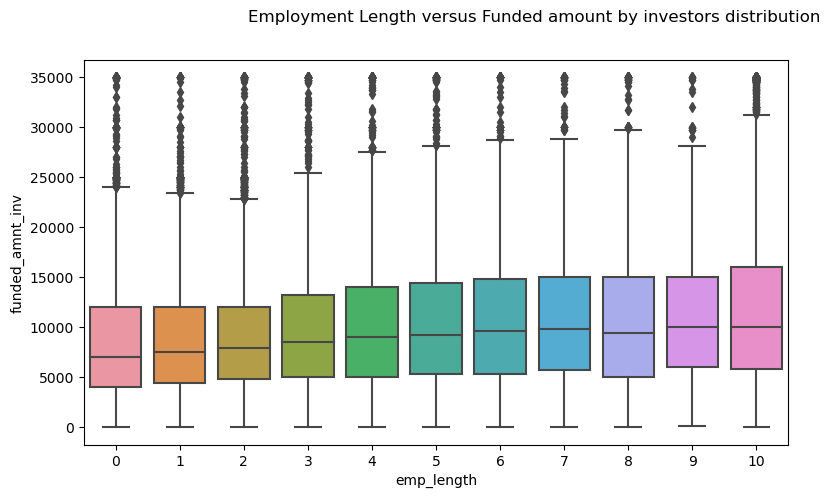

In [106]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x=filtered_df['emp_length'], y=filtered_df['funded_amnt_inv'])
plt.suptitle('Employment Length versus Funded amount by investors distribution',x=0.35)
plt.show()

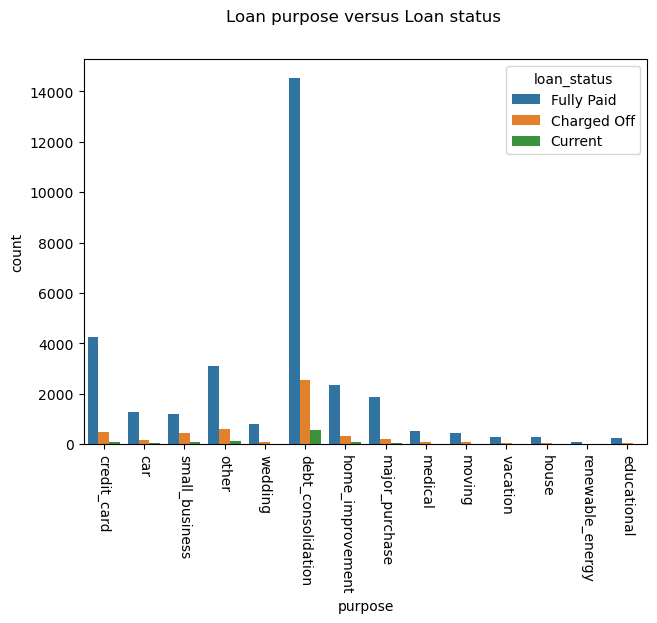

In [125]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.countplot(x='purpose', hue="loan_status", data=filtered_df)
plt.xticks(rotation=270)
plt.suptitle('Loan purpose versus Loan status',x=0.3)
plt.show()

#### Observation: It is found that the major part of the loan is being sanctioned for debt_consolidation and is fully paid as well.

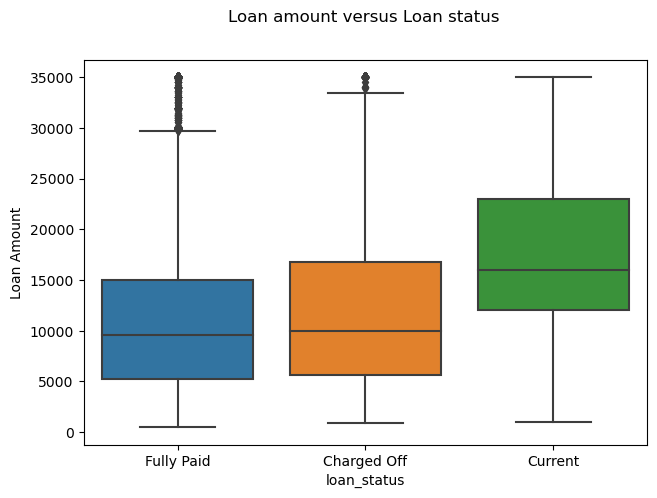

In [130]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot( y="loan_amnt", x='loan_status' , data=filtered_df)
plt.ylabel('Loan Amount')
plt.suptitle('Loan amount versus Loan status',x=0.3)
plt.show()

#### Observations: It is found that the Current status has more loan amount when compared to others. 75% Charged off loan is almost equal to 25% of Current loan.

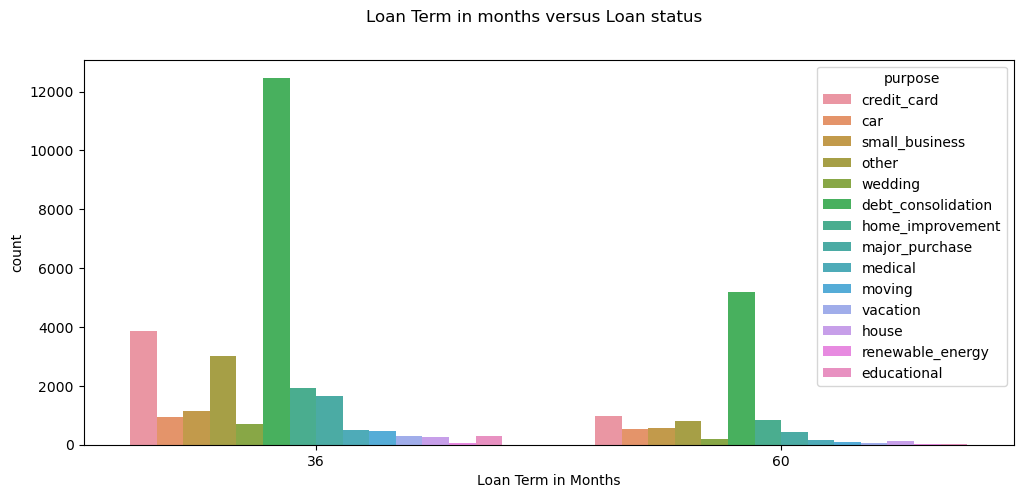

In [137]:
plt.figure(figsize=(12,5))
sns.countplot( x="term", hue='purpose', data=filtered_df)
plt.xlabel('Loan Term in Months')
plt.suptitle('Loan Term in months versus Loan status',x=0.5)
plt.show()

#### Observations: Debt consolidation has 36 months and it has highest current & fully paid borrowers and the Charged off borrowers as well.

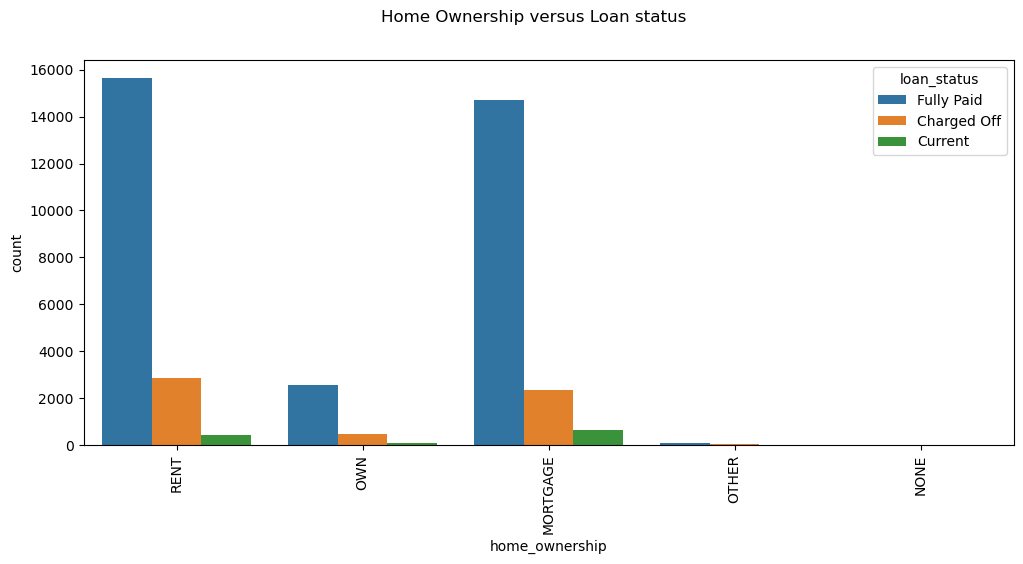

In [138]:
plt.figure(figsize=(12,5))
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.suptitle('Home Ownership versus Loan status',x=0.5)
plt.show()

### Observations: It was evident from the chart that the borrowers who have a rented house has higher percentage of being defaulter than mortgage.